# Star Wars Survey


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import OrderedDict
% matplotlib inline

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding = "ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
notnull = pd.notnull(star_wars["RespondentID"])
star_wars = star_wars[notnull]
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Changing columns **Have you seen any of the 6 films in the Star Wars franchise?** and
**Do you consider yourself to be a fan of the Star Wars film franchise?** to boolean values

In [5]:
yes_no = {
    "Yes": True,
    "No" : False
}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


### Converting Column Values to bool

In [6]:
movie_yes_no = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}
cols = star_wars.columns[3:9]
for col in cols:
    star_wars[col] = star_wars[col].map(movie_yes_no)
    
# Renaming each column in cols
movie_seen = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
}
star_wars = star_wars.rename(columns = movie_seen)
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [7]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

### Convert Rank cols to Float Type

In [8]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype("float")
movie_ranking = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': "ranking_1",
    'Unnamed: 10': "ranking_2",
    'Unnamed: 11': "ranking_3",
    'Unnamed: 12': "ranking_4",
    'Unnamed: 13': "ranking_5",
    'Unnamed: 14': "ranking_6"
}

star_wars = star_wars.rename(columns = movie_ranking)
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


## Mean of rankings

In [9]:
mean_df = star_wars[star_wars.columns[9:15]].mean()
mean_df

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

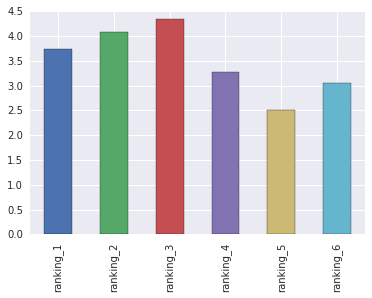

In [10]:
mean_df.plot.bar()

So far, we have:-
* cleaned up the data, 
* renamed several columns, and 
* computed the average ranking of each movie. 

As I suspected, it looks like the "original" movies are rated much more highly than the newer ones and **"Star Wars: Episode V The Empire Strikes Back"** is clearly the most liked of all of them.

## Movie View Counts

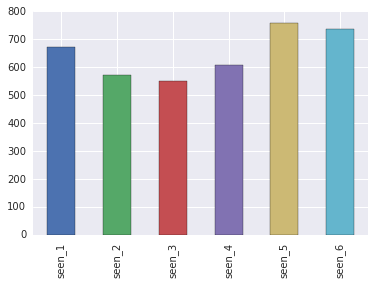

In [11]:
seen_df = star_wars[star_wars.columns[3:9]].sum()
seen_df.plot.bar()

It appears that the original movies were seen by more respondents than the newer movies. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.

In [12]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],

## Likings for different age-groups

Age groups are divided into 3 categories:
* 18-29 aged
* 30-44 aged
* 45-60 aged
* beyond 60

In [13]:
star_wars["Age"]

1       18-29
2       18-29
3       18-29
4       18-29
5       18-29
6       18-29
7       18-29
8       18-29
9       18-29
10      18-29
11        NaN
12        NaN
13      18-29
14      30-44
15      18-29
16      18-29
17      18-29
18      18-29
19      18-29
20      18-29
21      18-29
22      18-29
23      18-29
24      18-29
25      18-29
26      18-29
27      18-29
28      18-29
29      18-29
30      18-29
        ...  
1157    30-44
1158    45-60
1159    45-60
1160     > 60
1161    18-29
1162      NaN
1163    18-29
1164     > 60
1165    45-60
1166    30-44
1167    18-29
1168    30-44
1169    30-44
1170    45-60
1171    45-60
1172     > 60
1173     > 60
1174    30-44
1175     > 60
1176    45-60
1177    45-60
1178     > 60
1179    18-29
1180    45-60
1181    45-60
1182    18-29
1183    30-44
1184    30-44
1185    45-60
1186     > 60
Name: Age, Length: 1186, dtype: object

In [14]:
def extract_age(string):
    try:
        inner_list = re.findall("[0-9]{2}", string)
        return inner_list[0]
    except Exception:
        return np.nan

star_wars["age_numeric"] = star_wars["Age"].apply(extract_age)
star_wars["age_numeric"] = star_wars["age_numeric"].astype(float)
star_wars["age_numeric"]

1       18.0
2       18.0
3       18.0
4       18.0
5       18.0
6       18.0
7       18.0
8       18.0
9       18.0
10      18.0
11       NaN
12       NaN
13      18.0
14      30.0
15      18.0
16      18.0
17      18.0
18      18.0
19      18.0
20      18.0
21      18.0
22      18.0
23      18.0
24      18.0
25      18.0
26      18.0
27      18.0
28      18.0
29      18.0
30      18.0
        ... 
1157    30.0
1158    45.0
1159    45.0
1160    60.0
1161    18.0
1162     NaN
1163    18.0
1164    60.0
1165    45.0
1166    30.0
1167    18.0
1168    30.0
1169    30.0
1170    45.0
1171    45.0
1172    60.0
1173    60.0
1174    30.0
1175    60.0
1176    45.0
1177    45.0
1178    60.0
1179    18.0
1180    45.0
1181    45.0
1182    18.0
1183    30.0
1184    30.0
1185    45.0
1186    60.0
Name: age_numeric, Length: 1186, dtype: float64

In [64]:
grouped = star_wars.groupby("age_numeric")
# getting average of the ranking columns [8:14] and sum of seen columns[2:8]
agg_dict = OrderedDict()
agg_dict["seen_1"]= np.sum
agg_dict["seen_2"]= np.sum
agg_dict["seen_3"]= np.sum
agg_dict["seen_4"]= np.sum
agg_dict["seen_5"]= np.sum
agg_dict["seen_6"]= np.sum
agg_dict["ranking_1"]= np.mean
agg_dict["ranking_2"]= np.mean
agg_dict["ranking_3"]= np.mean
agg_dict["ranking_4"]= np.mean
agg_dict["ranking_5"]= np.mean
agg_dict["ranking_6"]= np.mean

age_grouped_df = grouped.agg(agg_dict)
age_grouped_df

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
age_numeric,,,,,,,,,,,,
18.0,160.0,148.0,145.0,152.0,160.0,160.0,4.100000,4.100000,3.966667,2.994444,2.722222,3.116667
30.0,175.0,158.0,152.0,176.0,197.0,197.0,4.347826,4.309179,4.475728,2.932367,2.212560,2.714976
45.0,181.0,148.0,142.0,165.0,220.0,210.0,3.541667,4.170833,4.537500,3.308333,2.437500,3.004167
60.0,143.0,106.0,100.0,104.0,168.0,158.0,3.010417,3.761658,4.316062,3.808290,2.730570,3.357513


In [68]:
age_grouped_df["movie_count"] = age_grouped_df[age_grouped_df.columns[0:6]].apply(np.sum, axis = 1)
age_grouped_df

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,movie_count
age_numeric,,,,,,,,,,,,,
18.0,160.0,148.0,145.0,152.0,160.0,160.0,4.100000,4.100000,3.966667,2.994444,2.722222,3.116667,925.0
30.0,175.0,158.0,152.0,176.0,197.0,197.0,4.347826,4.309179,4.475728,2.932367,2.212560,2.714976,1055.0
45.0,181.0,148.0,142.0,165.0,220.0,210.0,3.541667,4.170833,4.537500,3.308333,2.437500,3.004167,1066.0
60.0,143.0,106.0,100.0,104.0,168.0,158.0,3.010417,3.761658,4.316062,3.808290,2.730570,3.357513,779.0


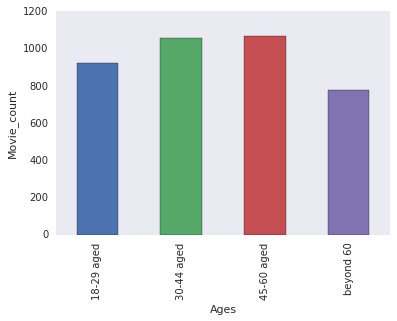

In [81]:
sns.set_style("dark")
ax = age_grouped_df["movie_count"].plot.bar()
label_list = ["18-29 aged", "30-44 aged", "45-60 aged", "beyond 60"]
ax.set_xticklabels(label_list)
ax.set_xlabel("Ages")
ax.set_ylabel("Movie_count")
plt.show()

This graph shows that the middle aged people tend to have more interest in watching movies. Even the youth have lesser interest in movies than the middle aged group.

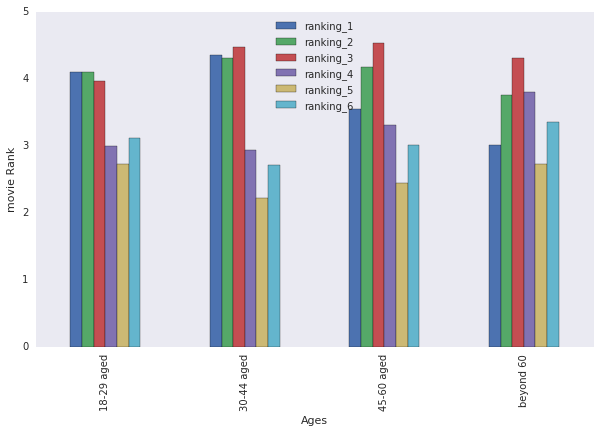

In [86]:
# Lesser the movie ranking, the better the movie is
ax = age_grouped_df[age_grouped_df.columns[6:12]].plot.bar(figsize = (10,6))
label_list = ["18-29 aged", "30-44 aged", "45-60 aged", "beyond 60"]
ax.set_xticklabels(label_list)
ax.set_xlabel("Ages")
ax.set_ylabel("movie Rank")

From above, it seems **every age groups has similar kind of interest in movies** as all of them gives similar ratings to different Star Wars movies

## Potential next steps:
* Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
    * Which character do respondents like the most?
    * Which character do respondents dislike the most?
    * Which character is the most controversial (split between likes and dislikes)?